# Titanic Dataset - Exploratory Data Analysis (EDA)

This notebook contains a comprehensive exploratory data analysis of the famous Titanic dataset. We'll explore survival trends based on demographics, class, and other factors.

## Table of Contents
1. Load the Titanic Dataset
2. Check Data Summary and Missing Values
3. Handle Missing Values with Machine Learning Imputation
4. Create Missing Values Heatmap
5. Univariate Analysis
6. Bivariate Analysis
7. Survival Analysis by Additional Features
8. Feature Engineering
9. Advanced Feature Engineering with Interaction Terms
10. Correlation Analysis and Heatmap
11. Conclusion and Insights

In [2]:
!pip install seaborn pandas numpy matplotlib scikit-learn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.0 MB 18.0 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.0 MB 15.3 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 13.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.7 MB 14.5 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.7 MB 13.3 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.7 MB 12.9 MB/s eta 0:00:01
   -------------------------------- ------- 10.2/12.7 MB 12.8 MB/s eta 0:00:01
   ---------------------------------------  12.6/12.7 MB 12.7 MB/s eta 0:00:01
   -------------------

## 1. Load the Titanic Dataset

The Titanic dataset is a popular dataset to explore survival trends based on demographics and class.

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

# Preview the first few rows
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Check Data Summary and Missing Values

Inspect the dataset for shape, column names, missing values, and data types.

In [4]:
# Dataset overview
print("Shape of the dataset:", titanic_data.shape)
print("\nColumns in the dataset:\n", titanic_data.columns)

# Check for missing values
print("\nMissing values in each column:\n", titanic_data.isnull().sum())

# Data types and summary statistics
print("\nData types:\n", titanic_data.dtypes)
print("\nSummary Statistics:\n", titanic_data.describe(include='all'))

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           su

In [5]:
# Check missing values percentage
print("\nMissing values in each column:\n", titanic_data.isnull().sum())
print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


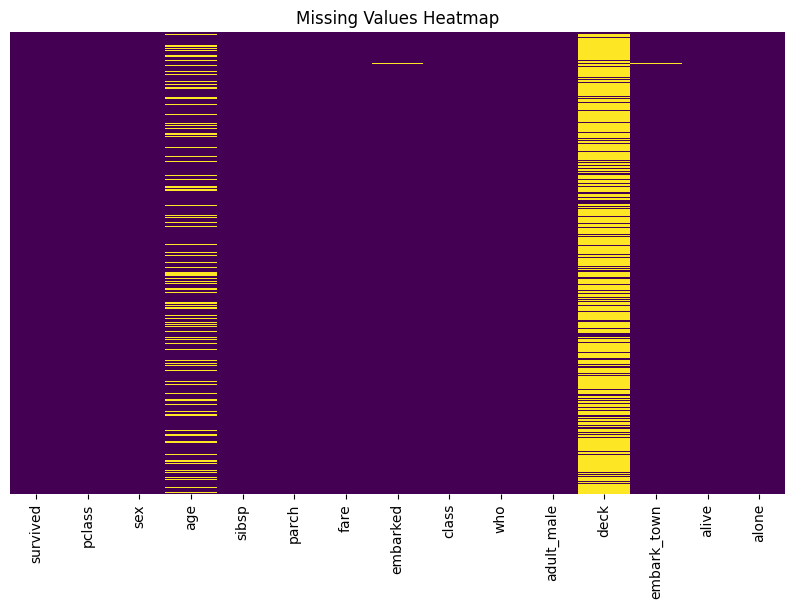

In [6]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## 3. Impute Missing Values with Machine Learning

We'll use IterativeImputer with RandomForestRegressor to handle missing numerical values and mode imputation for categorical variables.

In [7]:
# Import necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Create a copy to avoid modifying the original DataFrame
titanic_data_filled = titanic_data.copy()

# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Use IterativeImputer for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

# Fill categorical features with the mode (most frequent value)
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Verify if there are any missing values left
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


c:\Users\priya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## 4. Univariate Analysis

Explore individual variables (survived, pclass, age, sex).


Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


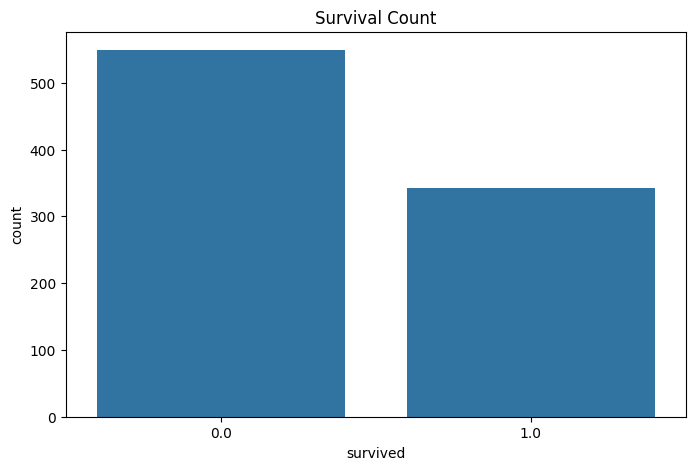


Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


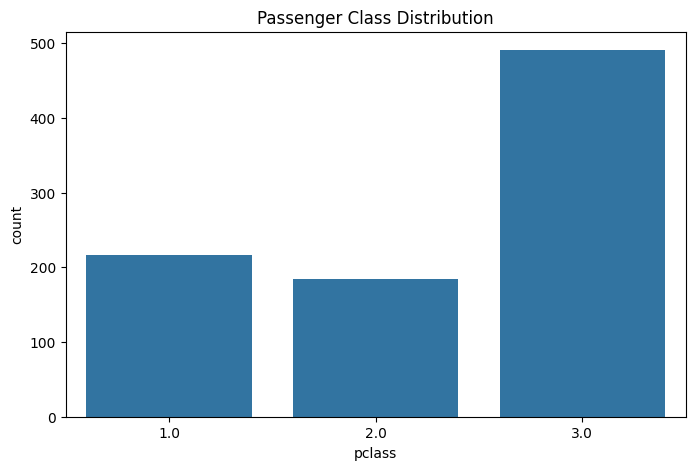


Age Statistics:
 count    891.000000
mean      29.671742
std       13.757116
min        0.420000
25%       21.000000
50%       28.027237
75%       37.000000
max       80.000000
Name: age, dtype: float64


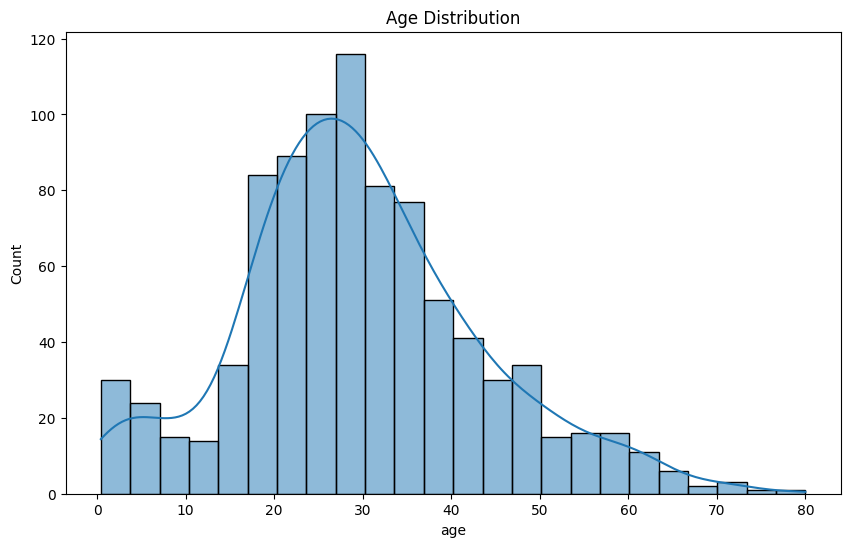


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


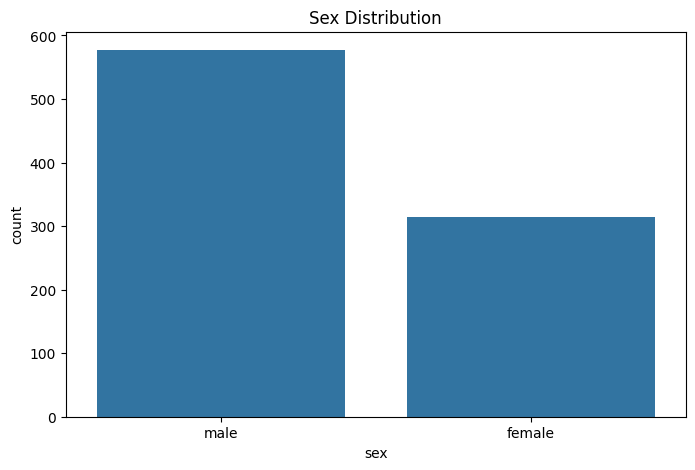

In [8]:
# Analyze 'survived'
print("\nSurvival Count:\n", titanic_data_filled['survived'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()

# Analyze 'pclass'
print("\nPclass Distribution:\n", titanic_data_filled['pclass'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', data=titanic_data_filled)
plt.title('Passenger Class Distribution')
plt.show()

# Analyze 'age'
print("\nAge Statistics:\n", titanic_data_filled['age'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=titanic_data_filled, kde=True)
plt.title('Age Distribution')
plt.show()

# Analyze 'sex'
print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=titanic_data_filled)
plt.title('Sex Distribution')
plt.show()

## 5. Bivariate Analysis

Explore survival trends based on gender, class, and age.


Survival by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


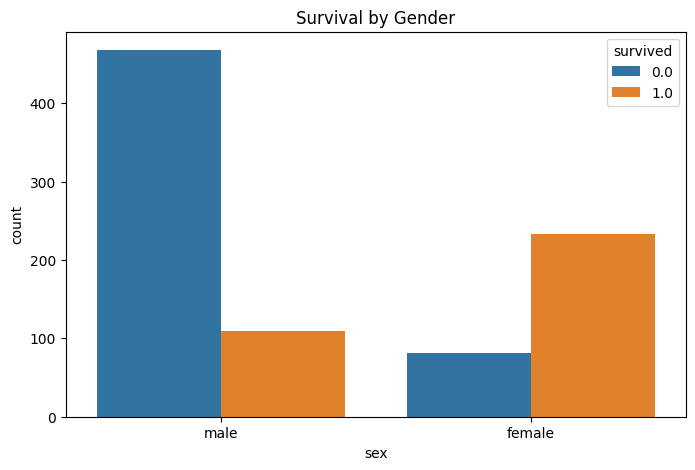


Survival by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


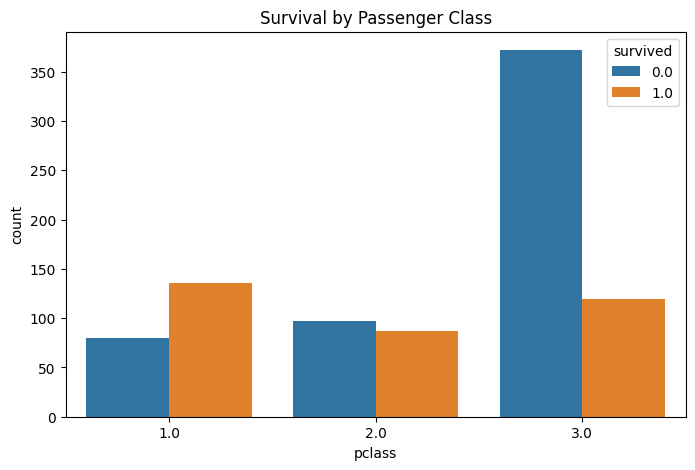

C:\Users\priya\AppData\Local\Temp\ipykernel_42560\3630483352.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())



Survival by Age Group:
 age_group  survived
Child      0.0          80
           1.0          78
Adult      0.0         462
           1.0         263
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


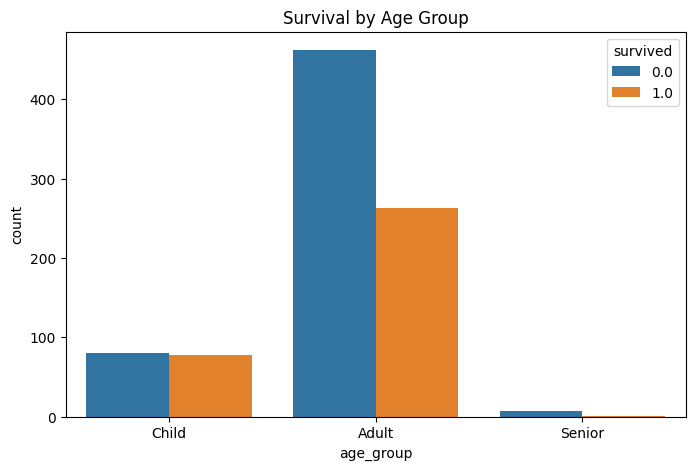


Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


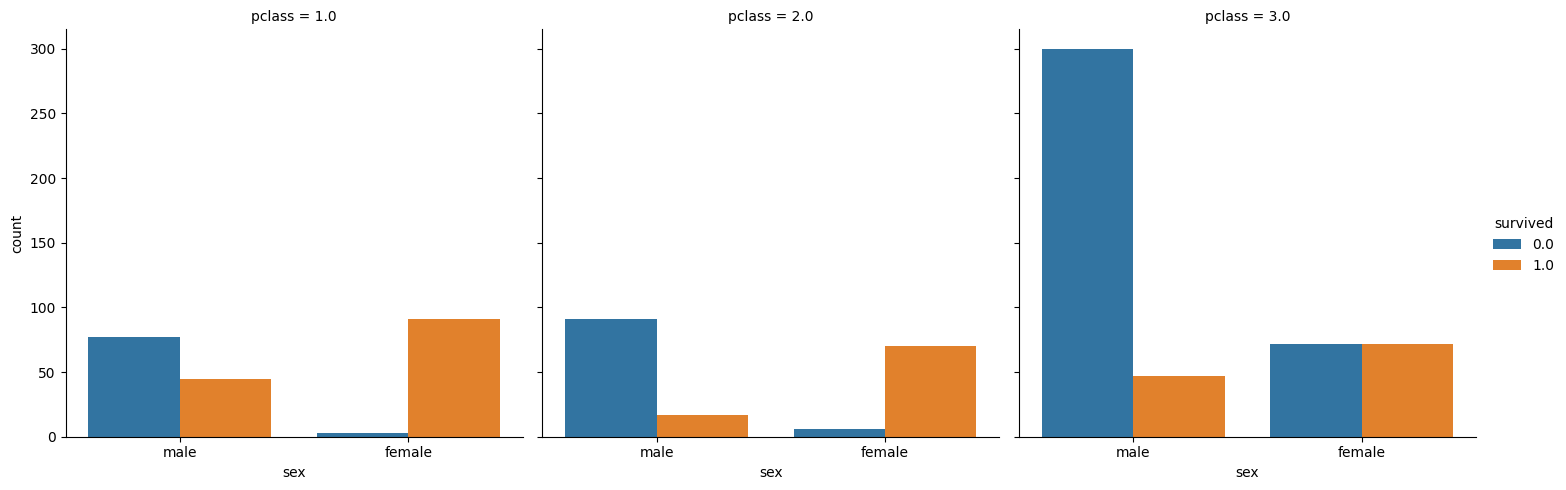

In [9]:
# Analyze survival based on gender
print("\nSurvival by Gender:\n", titanic_data_filled.groupby('sex')['survived'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='survived', data=titanic_data_filled)
plt.title('Survival by Gender')
plt.show()

# Analyze survival based on passenger class
print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('pclass')['survived'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='survived', data=titanic_data_filled)
plt.title('Survival by Passenger Class')
plt.show()

# Analyze survival based on age groups (create age bins)
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])
print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled)
plt.title('Survival by Age Group')
plt.show()

# Further exploration: Analyze survival based on combinations of factors
# Example: Survival based on gender and class
print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['sex', 'pclass'])['survived'].value_counts())
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_data_filled)
plt.show()

## 6. Insights from Analysis

### Key Findings:

- **Gender**: Females had a higher survival rate compared to males.
- **Class**: Passengers in 1st class had better chances of survival.
- **Age**: Younger passengers (children) were more likely to survive.

## 7. Survival Analysis by Additional Features

We'll analyze how survival depends on specific features, such as:
- Embarkation points
- Fare ranges
- Family size (combining sibsp and parch)

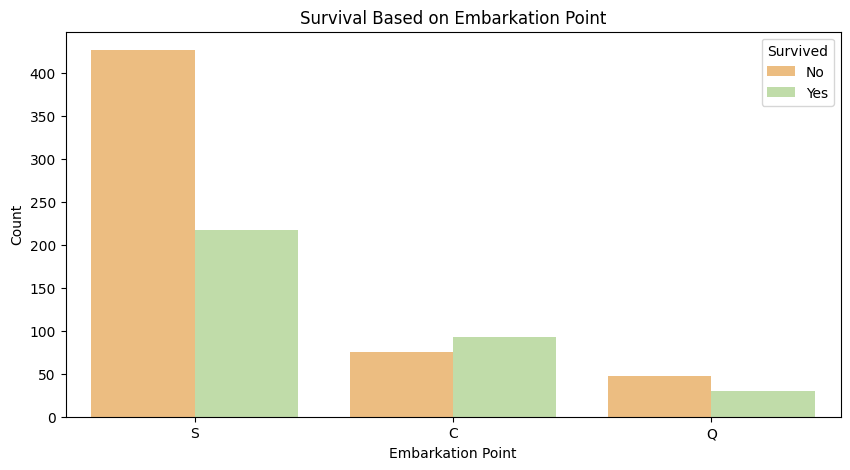

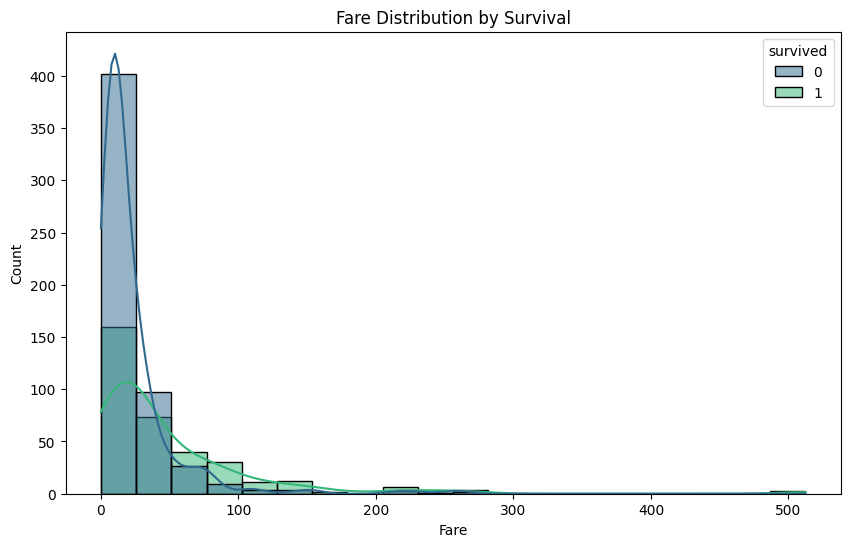

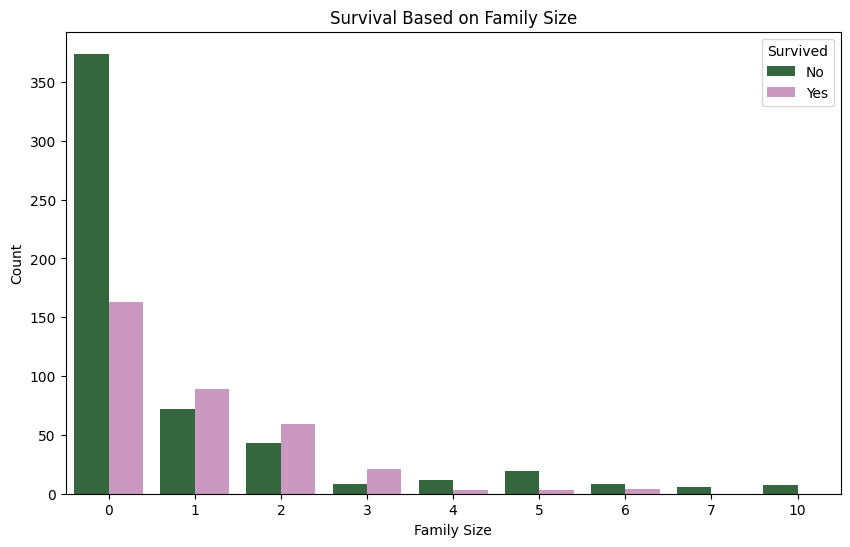

In [10]:
# Survival Based on Embarkation Point
plt.figure(figsize=(10, 5))
sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='Spectral')
plt.title('Survival Based on Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival Based on Fare
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Family Size Analysis
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## 8. Feature Engineering

Create meaningful features for better insights:
- Family Size: Combine sibsp and parch
- Age Group: Categorize passengers into age brackets

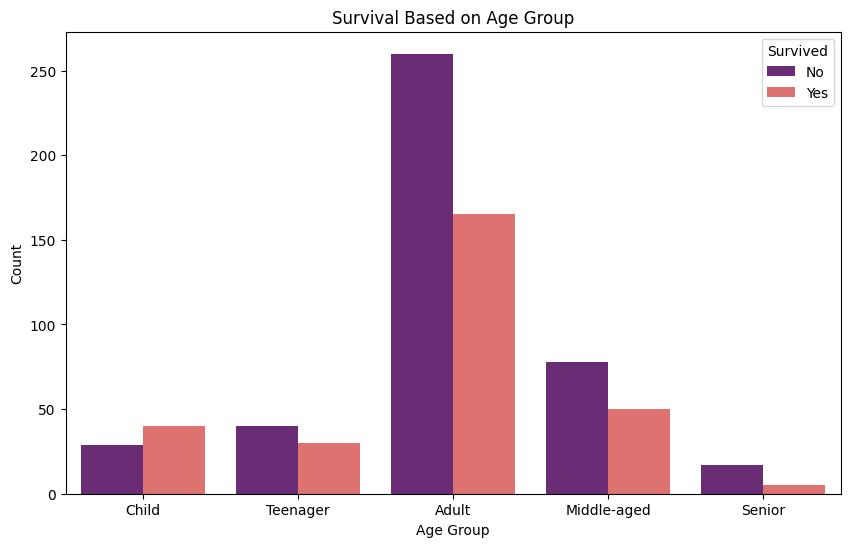

In [11]:
# Create Age Group with more detailed bins
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

# Visualize Survival by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')
plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## 9. Advanced Feature Engineering with Interaction Terms

Create more sophisticated features including interaction terms and non-linear transformations.

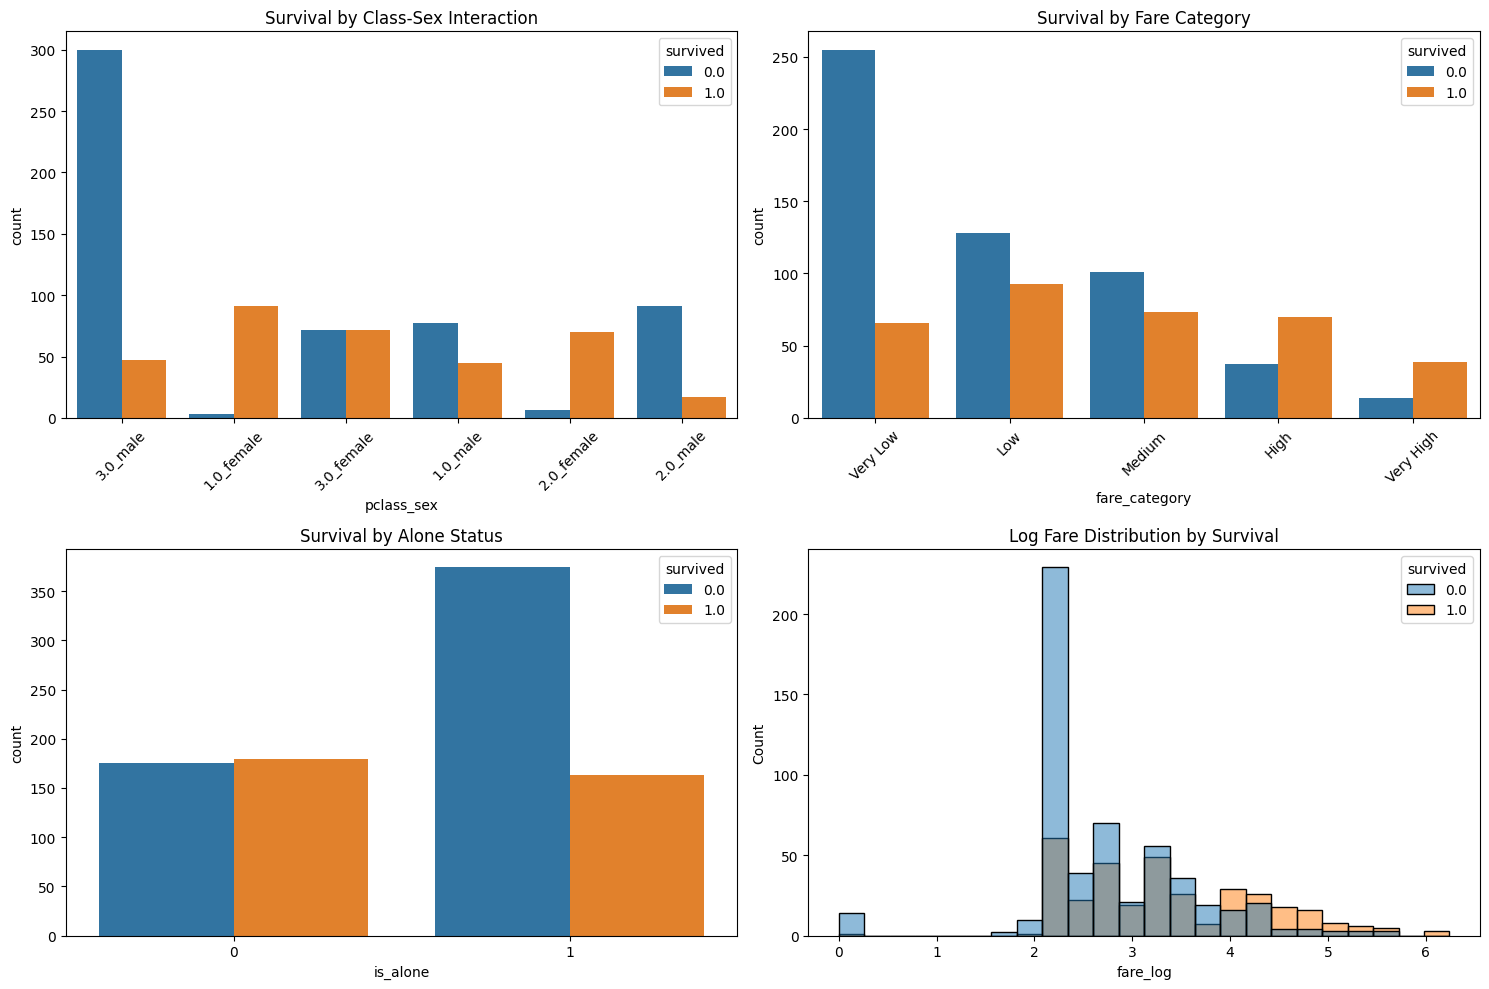

New features created:
- pclass_sex: Interaction between passenger class and sex
- fare_category: Categorical fare ranges
- fare_log: Log-transformed fare
- is_alone: Binary indicator for traveling alone
- age_squared: Squared age for non-linear effects


In [12]:
# Create interaction features
titanic_data_filled['pclass_sex'] = titanic_data_filled['pclass'].astype(str) + '_' + titanic_data_filled['sex']

# Create fare categories
titanic_data_filled['fare_category'] = pd.cut(titanic_data_filled['fare'], 
                                            bins=[0, 10, 25, 50, 100, 600], 
                                            labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create non-linear fare transformation (log transformation)
titanic_data_filled['fare_log'] = np.log1p(titanic_data_filled['fare'])

# Create title feature from name (if available)
# For this example, we'll create a simple title feature
titanic_data_filled['is_alone'] = (titanic_data_filled['sibsp'] + titanic_data_filled['parch'] == 0).astype(int)

# Age squared for non-linear age effects
titanic_data_filled['age_squared'] = titanic_data_filled['age'] ** 2

# Visualize some of these new features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Pclass-Sex interaction
sns.countplot(x='pclass_sex', hue='survived', data=titanic_data_filled, ax=axes[0,0])
axes[0,0].set_title('Survival by Class-Sex Interaction')
axes[0,0].tick_params(axis='x', rotation=45)

# Fare categories
sns.countplot(x='fare_category', hue='survived', data=titanic_data_filled, ax=axes[0,1])
axes[0,1].set_title('Survival by Fare Category')
axes[0,1].tick_params(axis='x', rotation=45)

# Is alone
sns.countplot(x='is_alone', hue='survived', data=titanic_data_filled, ax=axes[1,0])
axes[1,0].set_title('Survival by Alone Status')

# Log fare distribution
sns.histplot(data=titanic_data_filled, x='fare_log', hue='survived', ax=axes[1,1])
axes[1,1].set_title('Log Fare Distribution by Survival')

plt.tight_layout()
plt.show()

print("New features created:")
print("- pclass_sex: Interaction between passenger class and sex")
print("- fare_category: Categorical fare ranges")
print("- fare_log: Log-transformed fare")
print("- is_alone: Binary indicator for traveling alone")
print("- age_squared: Squared age for non-linear effects")

## 10. Correlation Analysis and Heatmap

Analyze correlations between numerical features.

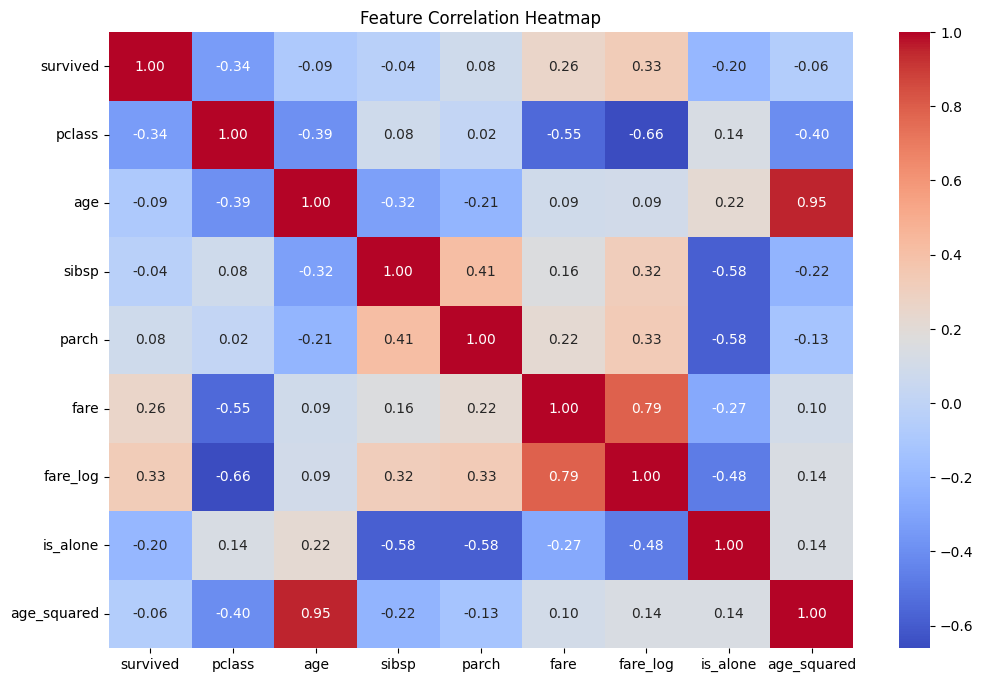


Correlation with Survival:
survived       1.000000
pclass        -0.338481
fare_log       0.329862
fare           0.257307
is_alone      -0.203367
age           -0.086772
parch          0.081629
age_squared   -0.063900
sibsp         -0.035322
Name: survived, dtype: float64


In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric features for correlation calculation
numeric_features = titanic_data_filled.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Display correlation with survival specifically
survival_corr = numeric_features.corr()['survived'].sort_values(key=abs, ascending=False)
print("\nCorrelation with Survival:")
print(survival_corr)

## 11. Conclusion and Analysis of Titanic Dataset EDA

After conducting a detailed exploratory data analysis (EDA) on the Titanic dataset, here are the key findings and insights:

### 1. Demographic Insights

**Gender:**
- Females had a significantly higher survival rate compared to males. This aligns with the historical "women and children first" policy during the evacuation.

**Age Groups:**
- Children (age ≤12) had the highest survival rate among all age groups.
- Adults (18–40 years) had a moderate survival rate, whereas older passengers (60+ years) had lower chances of survival.

### 2. Socioeconomic Insights

**Passenger Class (Pclass):**
- Passengers in 1st class had much better survival chances compared to those in 2nd or 3rd class.
- The survival disparity likely resulted from better access to lifeboats and proximity to rescue points on the ship.

**Fare:**
- Higher ticket fares were associated with increased survival rates. Wealthier passengers were more likely to be in 1st class, which offered better safety measures.

### 3. Family and Social Connections

**Family Size:**
- Passengers with small family sizes (1–3 members) had higher survival rates.
- Large families (5+ members) had a lower likelihood of survival, possibly due to challenges in coordinating and accessing lifeboats.

**SibSp and Parch:**
- Passengers traveling alone had lower survival rates compared to those with companions.

### 4. Embarkation Point

- Passengers who embarked at Cherbourg (C) had the highest survival rate.
- Those who boarded at Southampton (S) had moderate survival chances, while Queenstown (Q) passengers had the lowest survival rates.

### 5. Correlation Analysis

- Strong positive correlation observed between fare and survived, indicating that economic status played a significant role in survival.
- A slight correlation between pclass and fare, emphasizing the advantages of being in the upper classes.

### Final Observations

- **Survival Trends**: Survival was heavily influenced by gender, age, socioeconomic status, and embarkation point.
- **Disparities**: Gender and class disparities were the most striking survival determinants, with females and 1st-class passengers significantly more likely to survive.
- **Data Completeness**: The dataset had some missing values (e.g., age), which were handled through imputation, ensuring a robust analysis.
- **Feature Engineering**: Advanced features like interaction terms and non-linear transformations revealed additional patterns in the data.